In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# reading the csv dataset with semicolon seperator
df_orig = pd.read_csv("/Users/provitchordia/PycharmProjects/CaseStudy/bank/bank-full.csv",sep=";")

In [3]:
#copy orignal data into new dataframe
df = df_orig.copy()
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


y
False    39922
True      5289
Name: y, dtype: int64


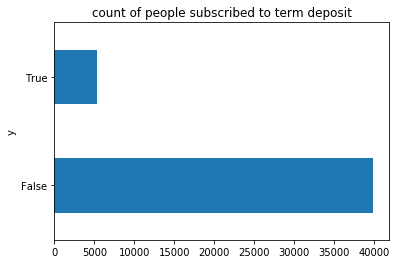

In [73]:
print(df.groupby(["y"])["y"].count())
df.groupby(["y"])["y"].count().plot.barh(title='count of people subscribed to term deposit')

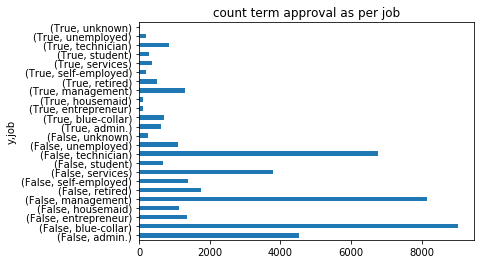

In [60]:
#data analysis
df.groupby(["y","job"])['y'].count().plot.barh(title='count term approval as per job')

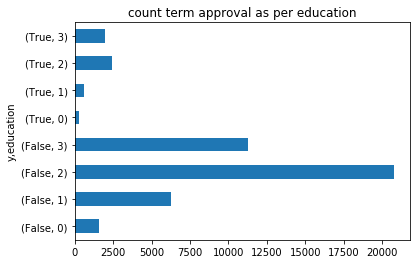

In [61]:
#data analysis
df.groupby(["y",'education'])['y'].count().plot.barh(title='count term approval as per education')

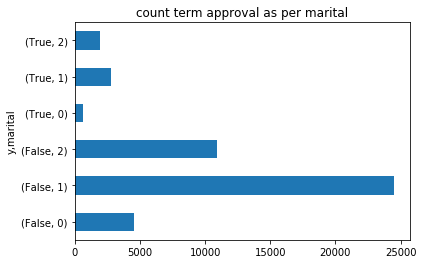

In [62]:
#data analysis
df.groupby(["y",'marital'])['y'].count().plot.barh(title = 'count term approval as per marital')

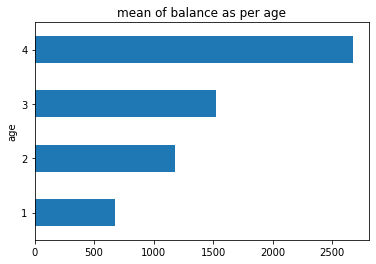

In [63]:
#data analysis
df.groupby("age")["balance"].mean().plot.barh(title='mean of balance as per age')

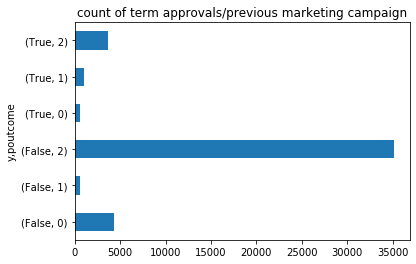

In [69]:
#data analysis
df.groupby(["y","poutcome"])["y"].count().plot.barh(title= "count of term approvals/previous marketing campaign")

In [5]:
# formatting data
# converted boolean variables to true and False
# assigned numerical values to marital status and education 
# bucketed age into different categories as it will make categorisation easier
# poutcome, divided into 3 categories. Bucketed unknown and others in same category

def formatData(df):
    df["housing"] = df["housing"].map({"yes": True, "no": False})
    df["loan"] = df["loan"].map({"yes": True, "no": False})
    df["default"] = df["default"].map({"yes": True, "no": False})
    df["marital"] = df["marital"].map({"divorced": 0, "married": 1, "single":2})
    df["education"] = df["education"].map({"unknown": 0, "primary": 1, "secondary":2, "tertiary": 3})
    df['age'] = pd.cut(df['age'], bins=['0','20', '40', '60', '99'], labels=[1,2,3,4])
    df['contact'] = df['contact'].map({"unknown": 0, "cellular": 1,"telephone": 2})
    df['poutcome'] = df['poutcome'].map({"failure": 0, "success": 1,"other": 2,"unknown":2})
    df["y"] = df["y"].map({"yes": True, "no": False})
    return df

df = formatData(df)

marital      0.045588
education    0.051341
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact      0.130590
day         -0.028348
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.096372
Name: y, dtype: float64


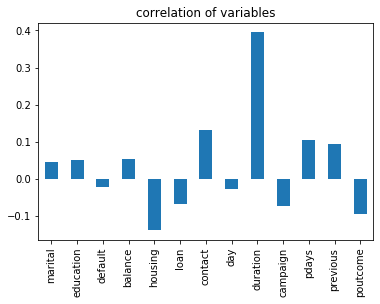

In [6]:
#finding correlation
coff = df.corr()
#picking only last column and skipping last row as relation will be 100% with same bariable i.e.y
print(coff.iloc[:-1,-1])
coff.iloc[:-1,-1].plot.bar(title="correlation of variables")

In [7]:
#data analysis
df.groupby(["y"])["duration"].mean()

y
False    221.182806
True     537.294574
Name: duration, dtype: float64

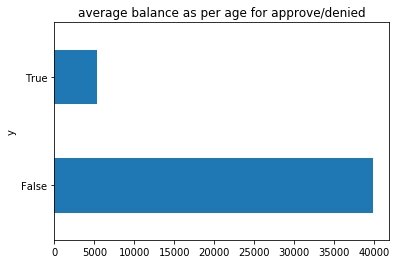

In [65]:
#data analysis
df.groupby(["y"])["loan"].count().plot.barh(title="average balance as per age for approve/denied")

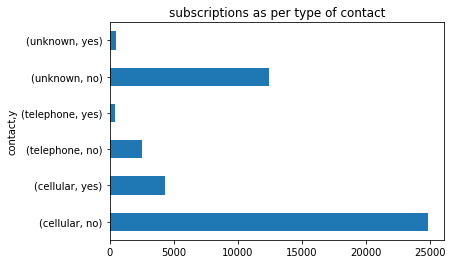

In [64]:
#data analysis
df_orig.groupby(["contact","y"])["y"].count().plot.barh(title="subscriptions as per type of contact")

In [10]:
#dividing dataframe to X and Y, so that one hot encoding of columns will not complicate things
X,y= df.iloc[:,:-1], df.iloc[:,-1] 
#One hot encoding
X = pd.get_dummies(X, columns=['job','age'])
#dropping month column
X=X.drop(columns=["month"])

In [11]:
from sklearn.model_selection import train_test_split
trainX, testx, trainY, testY = train_test_split(X,y, test_size=0.25, random_state=111,stratify=y)

In [35]:
#decision tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
# start =time.time()
model.fit(trainX, trainY)
# end=time.time()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
#scoring and predicting
scoretrain=model.score(trainX,trainY)
y_pred = model.predict(testx)

training score 1.0
accuracy 0.8667610368928603
precision 0.4462934947049924
recall 0.43255131964809385
time to train 0.1950829029083252
--------


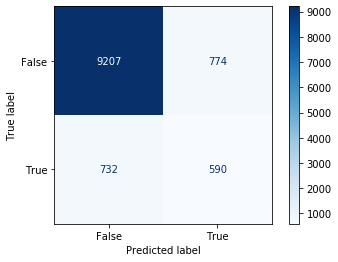

In [14]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
print("training score", scoretrain)
print("accuracy",metrics.accuracy_score(y_pred,testY))
print("precision",metrics.precision_score(y_pred,testY))
print("recall",metrics.recall_score(y_pred,testY))
print("time to train", end-start)

plot_confusion_matrix(model, testx, testY,cmap=plt.cm.Blues,values_format = '.0f') 
print("--------")

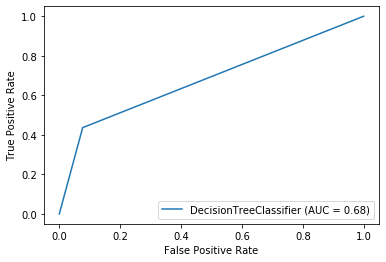

In [40]:
metrics.plot_roc_curve(model, testx, testY)  

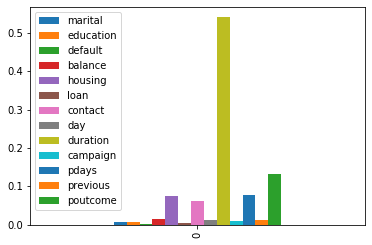

In [29]:
cols =  list(X.columns)
feat_imp = pd.DataFrame(model.feature_importances_).T
feat_imp.columns = cols
feat_imp.iloc[:,:-16].plot.bar()

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10, random_state=0)
start =time.time()
model.fit(trainX, trainY)
end=time.time()

In [17]:
y_pred = model.predict(testx)

accuracy 0.8992302928426081
precision 0.21331316187594554
recall 0.7401574803149606
time to train 1.8188140392303467
--------


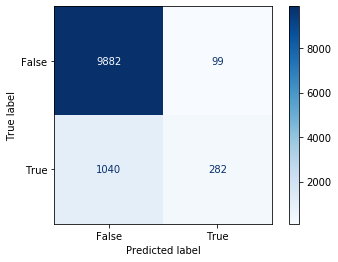

In [18]:
print("accuracy",metrics.accuracy_score(y_pred,testY))
print("precision",metrics.precision_score(y_pred,testY))
print("recall",metrics.recall_score(y_pred,testY))
print("time to train", end-start)

plot_confusion_matrix(model, testx, testY,cmap=plt.cm.Blues,values_format = '.0f') 
print("--------")

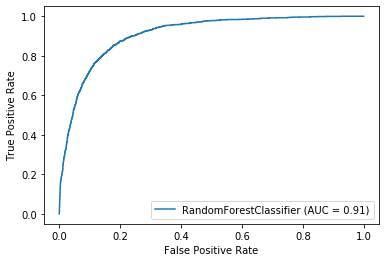

In [19]:
metrics.plot_roc_curve(model, testx, testY)  

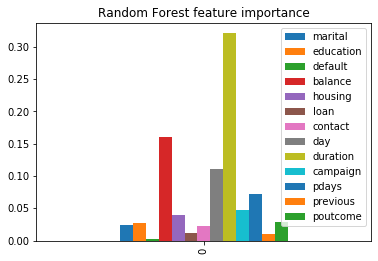

In [66]:
cols =  list(X.columns)
feat_imp = pd.DataFrame(model.feature_importances_).T
feat_imp.columns = cols
feat_imp.iloc[:,:-16].plot.bar(title="Random Forest feature importance")

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
start =time.time()
model.fit(trainX, trainY)
end=time.time()

In [21]:
y_pred = model.predict(testx)

accuracy 0.9012651508449084
precision 0.3653555219364599
recall 0.6355263157894737
time to train 3.704415798187256
--------


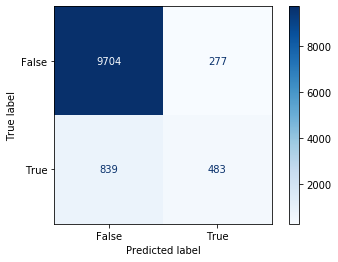

In [22]:
print("accuracy",metrics.accuracy_score(y_pred,testY))
print("precision",metrics.precision_score(y_pred,testY))
print("recall",metrics.recall_score(y_pred,testY))
print("time to train", end-start)
plot_confusion_matrix(model, testx, testY,cmap=plt.cm.Blues,values_format = '.0f') 

print("--------")

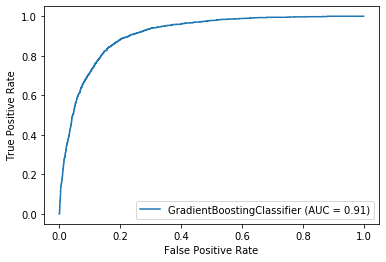

In [23]:
metrics.plot_roc_curve(model, testx, testY)  

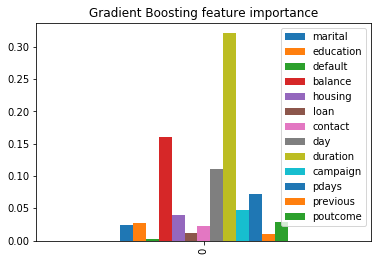

In [67]:
cols =  list(X.columns)
feat_imp = pd.DataFrame(model.feature_importances_).T
feat_imp.columns = cols
feat_imp.iloc[:,:-16].plot.bar(title="Gradient Boosting feature importance")